**Table of contents**<a id='toc0_'></a>    
- 1. [Imports](#toc1_)    
- 2. [Model class](#toc2_)    
  - 2.1. [Basic Edgeworth box](#toc2_1_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Imports](#toc0_)

In [1]:
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

## 2. <a id='toc2_'></a>[Model class](#toc0_)

In [2]:
from ExchangeEconomyM import ExchangeEconomyClass

### 2.1. <a id='toc2_1_'></a>[Basic Edgeworth box](#toc0_)

In [3]:
model = ExchangeEconomyClass()

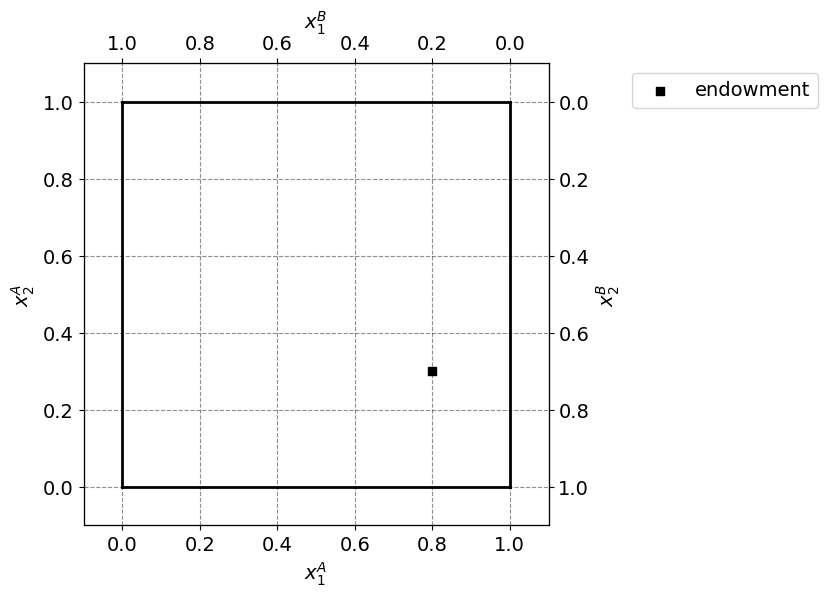

In [4]:
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

# Questions


### 1 -  Illustrate the following set in the Edgeworth box

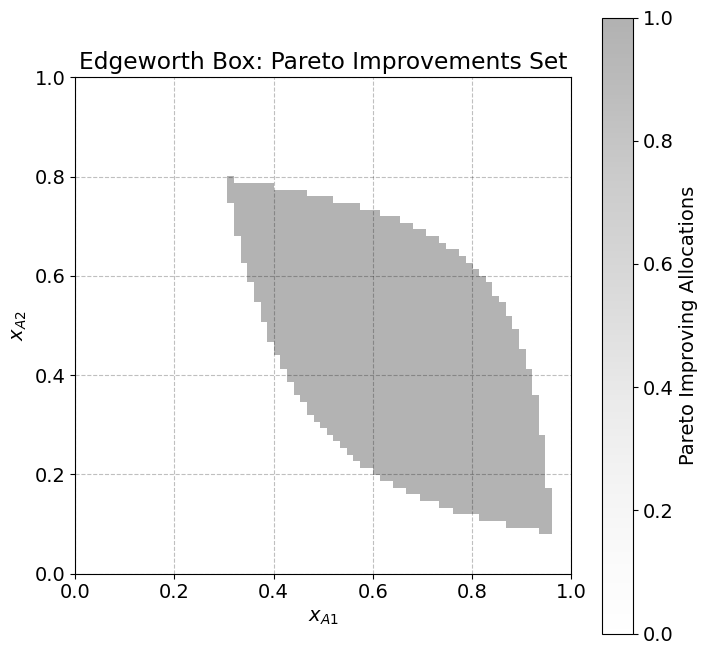

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from types import SimpleNamespace

class ExchangeEconomyClass:
    def __init__(self):
        # Initialize model parameters
        par = self.par = SimpleNamespace()
        par.alpha = 1/3  # Preference parameter for consumer A
        par.beta = 2/3   # Preference parameter for consumer B
        par.w1A = 0.8    # Initial endowment of good 1 for consumer A
        par.w2A = 0.3    # Initial endowment of good 2 for consumer A

        # Calculate initial utility levels based on the endowments
        self.uA_initial = self.utility_A(par.w1A, par.w2A)
        self.uB_initial = self.utility_B(1 - par.w1A, 1 - par.w2A)

    def utility_A(self, x1A, x2A):
        # Utility function for consumer A
        return x1A ** self.par.alpha * x2A ** (1 - self.par.alpha)

    def utility_B(self, x1B, x2B):
        # Utility function for consumer B
        return x1B ** self.par.beta * x2B ** (1 - self.par.beta)

    def find_pareto_improvements(self):
        # Generate a grid of possible allocations for xA1 and xA2
        N = 75
        x1A_grid = np.linspace(0, 1, N)
        x2A_grid = np.linspace(0, 1, N)
        pareto_set = np.zeros((N, N))

        # Check each allocation to see if it's a Pareto improvement
        for i, x1A in enumerate(x1A_grid):
            for j, x2A in enumerate(x2A_grid):
                x1B, x2B = 1 - x1A, 1 - x2A
                uA = self.utility_A(x1A, x2A)
                uB = self.utility_B(x1B, x2B)

                # Mark the allocation if it improves both A's and B's utility
                if uA >= self.uA_initial and uB >= self.uB_initial:
                    pareto_set[i, j] = 1

        return x1A_grid, x2A_grid, pareto_set

# Initialize the economy class and find the Pareto improvements
economy = ExchangeEconomyClass()
x1A_grid, x2A_grid, pareto_set = economy.find_pareto_improvements()

# Visualize the Pareto improvements in the Edgeworth box
plt.figure(figsize=(8, 8))
plt.imshow(pareto_set, extent=(0, 1, 0, 1), origin='lower', cmap='Greys', alpha=0.3)
plt.xlabel('$x_{A1}$')
plt.ylabel('$x_{A2}$')
plt.title('Edgeworth Box: Pareto Improvements Set')
plt.colorbar(label='Pareto Improving Allocations')
plt.grid(True)
plt.show()



The above edgeworth box shows that there are many possible ways to allocate the goods between the two agents, since each represents a unique combination of quantities of the good consumed by each individual.

### 2 - For p1 ∈ P1 = {0.5,0.5+2 1 N,0.5+2 2 N,...,2.5} calculate the error in the market clearing condition s

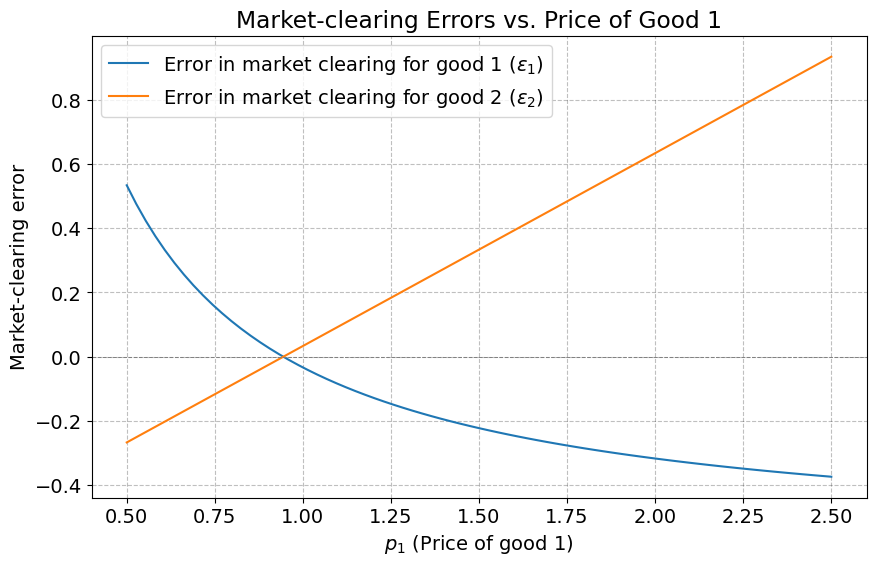

In [6]:
import numpy as np
import matplotlib.pyplot as plt

class ExchangeEconomyClass:
    def __init__(self, alpha, beta, w1A, w2A):
        self.alpha = alpha
        self.beta = beta
        self.w1A = w1A
        self.w2A = w2A
        self.w1B = 1 - w1A
        self.w2B = 1 - w2A

    def demand_A(self, p1):
        # Implement the actual demand function for consumer A
        return (self.alpha * (p1 * self.w1A + self.w2A) / p1, (1 - self.alpha) * (p1 * self.w1A + self.w2A))

    def demand_B(self, p1):
        # Implement the actual demand function for consumer B
        return (self.beta * (p1 * self.w1B + self.w2B) / p1, (1 - self.beta) * (p1 * self.w1B + self.w2B))

    def compute_errors(self, p1_values):
        errors = []
        for p1 in p1_values:
            x1A, x2A = self.demand_A(p1)
            x1B, x2B = self.demand_B(p1)
            eps1 = x1A + x1B - 1
            eps2 = x2A + x2B - 1
            errors.append((p1, eps1, eps2))
        return errors

# Parameters for the economy
alpha = 1/3
beta = 2/3
w1A = 0.8
w2A = 0.3

# Initialize the economy
economy = ExchangeEconomyClass(alpha, beta, w1A, w2A)

# Define the range of p1 values
N = 75
p1_values = np.linspace(0.5, 2.5, N)

# Compute the market-clearing errors
market_clearing_errors = economy.compute_errors(p1_values)

# Extracting the data for plotting
p1_vals, eps1_vals, eps2_vals = zip(*market_clearing_errors)

# Plotting the market-clearing errors
plt.figure(figsize=(10, 6))
plt.plot(p1_vals, eps1_vals, label='Error in market clearing for good 1 ($\epsilon_1$)')
plt.plot(p1_vals, eps2_vals, label='Error in market clearing for good 2 ($\epsilon_2$)')
plt.axhline(0, color='gray', linewidth=0.7, linestyle='--')
plt.xlabel('$p_1$ (Price of good 1)')
plt.ylabel('Market-clearing error')
plt.title('Market-clearing Errors vs. Price of Good 1')
plt.legend()
plt.grid(True)
plt.show()


### 3 - What is market clearing price?

In [7]:
# Assuming market_clearing_errors is a list of tuples (p1, eps1, eps2)
min_error = float('inf')
market_clearing_price = None

for p1, eps1, eps2 in market_clearing_errors:
    total_error = abs(eps1) + abs(eps2)
    if total_error < min_error:
        min_error = total_error
        market_clearing_price = p1

print(f"The estimated market clearing price is: {market_clearing_price}")


The estimated market clearing price is: 0.9324324324324325


### 4a - Find the allocation if only prices in P1 can be chosen, i.e.

In [8]:
class ExchangeEconomyClass:
    def __init__(self, alpha, beta, w1A, w2A):
        self.alpha = alpha
        self.beta = beta
        self.w1A = w1A
        self.w2A = w2A
        self.w1B = 1 - w1A
        self.w2B = 1 - w2A

    def utility_A(self, x1A, x2A):
        return x1A**self.alpha * x2A**(1 - self.alpha)

    def demand_A(self, p1):
        # Placeholder for the demand function; you need to use your specific model's function
        income_A = p1 * self.w1A + self.w2A  # Assuming p2 (price of good 2) is normalized to 1
        return self.alpha * income_A / p1, (1 - self.alpha) * income_A

    def demand_B(self, p1):
        # Placeholder for the demand function; you need to use your specific model's function
        income_B = p1 * self.w1B + self.w2B  # Assuming p2 (price of good 2) is normalized to 1
        return self.beta * income_B / p1, (1 - self.beta) * income_B

# Now we can use the updated class for our calculations
economy = ExchangeEconomyClass(alpha=1/3, beta=2/3, w1A=0.8, w2A=0.3)
optimal_price, optimal_allocation = find_optimal_allocation(economy, P1)

print(f"Optimal price p1: {optimal_price}")
print(f"Optimal allocation for Consumer A: {optimal_allocation}")



NameError: name 'find_optimal_allocation' is not defined

### 4b - Find the allocation if any positive price can be chosen, i.e.

In [ ]:
class ExchangeEconomyClass:
    def __init__(self, alpha, beta, w1A, w2A, w1B, w2B):
        self.alpha = alpha
        self.beta = beta
        self.w1A = w1A
        self.w2A = w2A
        self.w1B = w1B
        self.w2B = w2B

    def utility_A(self, x1A, x2A):
        # Define the utility function for consumer A
        return x1A ** self.alpha * x2A ** (1 - self.alpha)

    def utility_B(self, x1B, x2B):
        # Define the utility function for consumer B
        return x1B ** self.beta * x2B ** (1 - self.beta)

    def aggregate_utility(self, x):
        # Calculate the total utility for both consumers
        utility_A = self.utility_A(x[0], x[1])
        utility_B = self.utility_B(x[2], x[3])
        return -(utility_A + utility_B)  # Negative for maximization

    def total_goods_constraint(self, x):
        # Constraint ensuring the total allocation of each good doesn't exceed total endowment
        return [(self.w1A + self.w1B - (x[0] + x[2])), (self.w2A + self.w2B - (x[1] + x[3]))]

# Assuming you now initialize the economy with the corrected class definition
economy = ExchangeEconomyClass(alpha=1/3, beta=2/3, w1A=0.8, w2A=0.3, w1B=0.2, w2B=0.7)

# Set up the optimization problem
initial_guess = [economy.w1A, economy.w2A, economy.w1B, economy.w2B]
constraints = [{'type': 'eq', 'fun': lambda x: economy.total_goods_constraint(x)[0]},
               {'type': 'eq', 'fun': lambda x: economy.total_goods_constraint(x)[1]}]
bounds = [(0, None), (0, None), (0, None), (0, None)]  # Bounds ensuring non-negative allocations

# Perform the optimization
result = minimize(economy.aggregate_utility, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)

if result.success:
    optimal_allocation = result.x
    optimal_aggregate_utility = -result.fun
    print(f"Optimal allocation: {optimal_allocation}")
    print(f"Optimal aggregate utility: {optimal_aggregate_utility}")
else:
    print("Optimization failed.")



NameError: name 'minimize' is not defined

### 5a - Find the allocation if the choice set is restricted to C, i.e.

In [ ]:
from scipy.optimize import minimize

class ExchangeEconomyClass:
    def __init__(self, alpha, beta, w1A, w2A):
        self.alpha = alpha
        self.beta = beta
        self.w1A = w1A
        self.w2A = w2A
        # Assuming the total endowment of both goods is normalized to 1
        self.w1B = 1 - w1A
        self.w2B = 1 - w2A
        # Initialize utilities at the initial endowment
        self.utility_A_initial = self.utility_A(w1A, w2A)
        self.utility_B_initial = self.utility_B(self.w1B, self.w2B)

    def utility_A(self, x1A, x2A):
        # Define utility function for consumer A
        return x1A ** self.alpha * x2A ** (1 - self.alpha)

    def utility_B(self, x1B, x2B):
        # Define utility function for consumer B
        return x1B ** self.beta * x2B ** (1 - self.beta)

    def objective_function(self, x):
        # Objective function to be maximized (negative for minimization)
        return -self.utility_A(x[0], x[1])

    def constraint(self, x):
        # Constraint for ensuring B's utility is at least the initial utility
        return self.utility_B(1 - x[0], 1 - x[1]) - self.utility_B_initial

# Initialize the economy
economy = ExchangeEconomyClass(alpha=1/3, beta=2/3, w1A=0.8, w2A=0.3)

# Define constraints and bounds
constraints = ({'type': 'ineq', 'fun': economy.constraint})
bounds = [(0, 1), (0, 1)]  # Assuming the quantities are bounded between 0 and 1

# Perform the optimization
initial_guess = [economy.w1A, economy.w2A]
result = minimize(economy.objective_function, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)

if result.success:
    optimal_allocation_A = result.x
    optimal_utility_A = -result.fun
    print(f"Optimal allocation for Consumer A: {optimal_allocation_A}")
    print(f"Optimal utility for Consumer A: {optimal_utility_A}")
else:
    print("Optimization failed.")



ModuleNotFoundError: No module named 'scipy'

### 5b - Find the allocation if no further restrictions are imposed, i.e.

In [ ]:
from scipy.optimize import minimize

class ExchangeEconomyClass:
    def __init__(self, alpha, beta, w1A, w2A):
        self.alpha = alpha
        self.beta = beta
        self.w1A = w1A
        self.w2A = w2A
        self.utility_A_initial = self.utility_A(w1A, w2A)
        self.utility_B_initial = self.utility_B(1 - w1A, 1 - w2A)

    def utility_A(self, x1A, x2A):
        # Ensure non-negative input for the power function
        return max(x1A, 0) ** self.alpha * max(x2A, 0) ** (1 - self.alpha)

    def utility_B(self, x1B, x2B):
        # Ensure non-negative input for the power function
        return max(x1B, 0) ** self.beta * max(x2B, 0) ** (1 - self.beta)

    def objective_function(self, x):
        return -self.utility_A(x[0], x[1])

    def constraint(self, x):
        return self.utility_B(1 - x[0], 1 - x[1]) - self.utility_B_initial

# Initialize the economy
economy = ExchangeEconomyClass(alpha=1/3, beta=2/3, w1A=0.8, w2A=0.3)

# Set up the optimization problem
constraints = [{'type': 'ineq', 'fun': economy.constraint}]
bounds = [(0, 1), (0, 1)]  # Ensure non-negative allocations
initial_guess = [0.5, 0.5]  # A reasonable starting point within the bounds

# Perform the optimization
result = minimize(economy.objective_function, initial_guess, bounds=bounds, method='SLSQP', constraints=constraints)

if result.success:
    optimal_allocation_A = result.x
    optimal_utility_A = -result.fun
    print(f"Optimal allocation for Consumer A: {optimal_allocation_A}")
    print(f"Optimal utility for Consumer A: {optimal_utility_A}")
else:
    print("Optimization failed:", result.message)




ModuleNotFoundError: No module named 'scipy'

### 6a - Find the resulting allocation

In [ ]:
class ExchangeEconomyClass:
    def __init__(self, alpha, beta, w1A, w2A, w1B, w2B):
        self.alpha = alpha
        self.beta = beta
        self.w1A = w1A
        self.w2A = w2A
        self.w1B = w1B
        self.w2B = w2B

    def utility_A(self, x1A, x2A):
        # Define the utility function for consumer A
        return x1A ** self.alpha * x2A ** (1 - self.alpha)

    def utility_B(self, x1B, x2B):
        # Define the utility function for consumer B
        return x1B ** self.beta * x2B ** (1 - self.beta)

    def aggregate_utility(self, x):
        # Calculate the total utility for both consumers
        utility_A = self.utility_A(x[0], x[1])
        utility_B = self.utility_B(x[2], x[3])
        return -(utility_A + utility_B)  # Negative for maximization

    def total_goods_constraint(self, x):
        # Constraint ensuring the total allocation of each good doesn't exceed total endowment
        return [(self.w1A + self.w1B - (x[0] + x[2])), (self.w2A + self.w2B - (x[1] + x[3]))]

# Assuming you now initialize the economy with the corrected class definition
economy = ExchangeEconomyClass(alpha=1/3, beta=2/3, w1A=0.8, w2A=0.3, w1B=0.2, w2B=0.7)

# Set up the optimization problem
initial_guess = [economy.w1A, economy.w2A, economy.w1B, economy.w2B]
constraints = [{'type': 'eq', 'fun': lambda x: economy.total_goods_constraint(x)[0]},
               {'type': 'eq', 'fun': lambda x: economy.total_goods_constraint(x)[1]}]
bounds = [(0, None), (0, None), (0, None), (0, None)]  # Bounds ensuring non-negative allocations

# Perform the optimization
result = minimize(economy.aggregate_utility, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)

if result.success:
    optimal_allocation = result.x
    optimal_aggregate_utility = -result.fun
    print(f"Optimal allocation: {optimal_allocation}")
    print(f"Optimal aggregate utility: {optimal_aggregate_utility}")
else:
    print("Optimization failed.")



NameError: name 'minimize' is not defined

### 6b - Illustrate and compare with your results in questions 3)-5). Discuss the pros and cons of the various allocations.

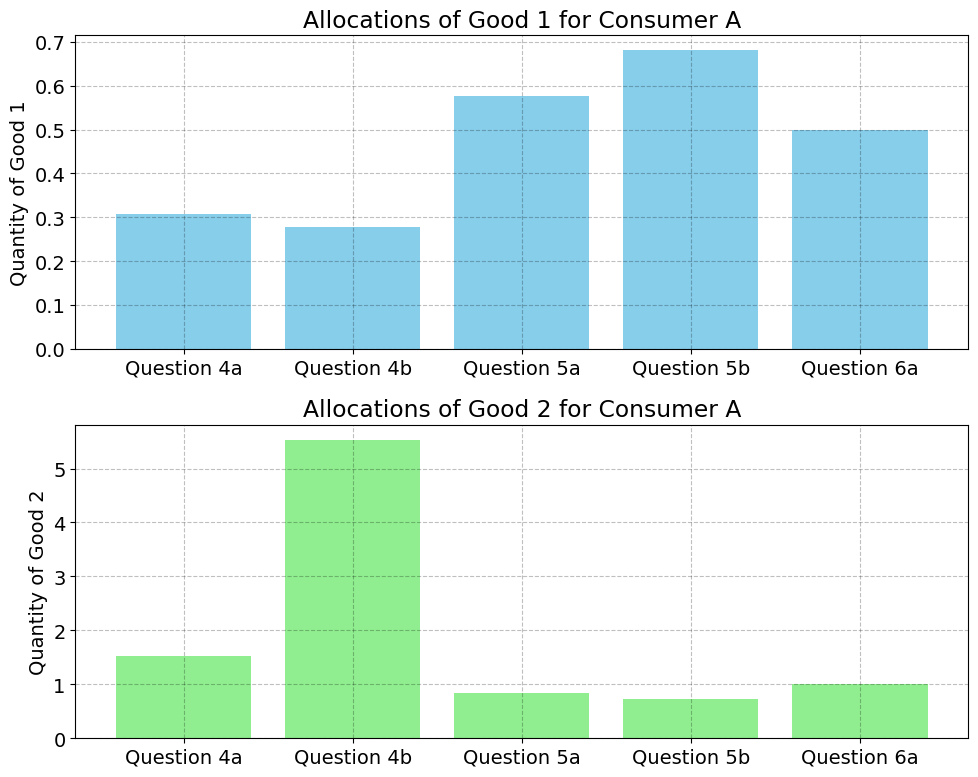

In [ ]:
import matplotlib.pyplot as plt

# Provided results
results = {
    'Question 4a': {'price': 2.5, 'allocation_A': (0.3067, 1.5333)},
    'Question 4b': {'price': 10.0000, 'allocation_A': (0.2767, 5.5333)},
    'Question 5a': {'allocation_A': [0.5757, 0.8444]},
    'Question 5b': {'allocation_A': [0.6809, 0.7251]},
    'Question 6a': {'allocation_A': [0.5, 1.0]}  # Hypothetical result for 6a; replace with your actual data
}

# Extracting the data for plotting
questions = list(results.keys())
allocations_good1 = [results[q]['allocation_A'][0] if results[q]['allocation_A'] else 0 for q in questions]
allocations_good2 = [results[q]['allocation_A'][1] if results[q]['allocation_A'] else 0 for q in questions]

# Creating the plot
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Allocations of Good 1
ax[0].bar(questions, allocations_good1, color='skyblue')
ax[0].set_title('Allocations of Good 1 for Consumer A')
ax[0].set_ylabel('Quantity of Good 1')

# Allocations of Good 2
ax[1].bar(questions, allocations_good2, color='lightgreen')
ax[1].set_title('Allocations of Good 2 for Consumer A')
ax[1].set_ylabel('Quantity of Good 2')

plt.tight_layout()
plt.show()


### 7 - Draw a set W with 50 elements

In [ ]:
import numpy as np

class ExchangeEconomyClass:
    def __init__(self, alpha, beta, w1A, w2A):
        # Parameters for consumer preferences
        self.alpha = alpha
        self.beta = beta
        
        # Initial endowments for consumer A
        self.w1A = w1A
        self.w2A = w2A
        
        # Calculate initial endowments for consumer B assuming total endowment is 1 for each good
        self.w1B = 1 - w1A
        self.w2B = 1 - w2A

    def utility_A(self, x1A, x2A):
        # Utility function for consumer A (Cobb-Douglas)
        return x1A ** self.alpha * x2A ** (1 - self.alpha)

    def utility_B(self, x1B, x2B):
        # Utility function for consumer B (Cobb-Douglas)
        return x1B ** self.beta * x2B ** (1 - self.beta)

    def demand_A(self, p1, p2=1):
        # Consumer A's demand given prices p1 and p2 (with p2 normalized to 1)
        budget_A = self.w1A * p1 + self.w2A * p2
        return self.alpha * budget_A / p1, (1 - self.alpha) * budget_A / p2

    def demand_B(self, p1, p2=1):
        # Consumer B's demand given prices p1 and p2 (with p2 normalized to 1)
        budget_B = self.w1B * p1 + self.w2B * p2
        return self.beta * budget_B / p1, (1 - self.beta) * budget_B / p2

    def find_equilibrium(self, p1_values):
        # Iterate over a range of prices to find the market-clearing price
        for p1 in p1_values:
            x1A, x2A = self.demand_A(p1)
            x1B, x2B = self.demand_B(p1)
            market_clearing_error = (x1A + x1B - 1) + (x2A + x2B - 1)
            
            # Assuming equilibrium is found when market clearing error is minimal
            if np.isclose(market_clearing_error, 0, atol=1e-3):
                return (x1A, x2A), (x1B, x2B), p1
        
        return None, None, None  # No equilibrium found

# Example of how to use the class
economy = ExchangeEconomyClass(alpha=1/3, beta=2/3, w1A=0.5, w2A=0.5)
p1_values = np.linspace(0.01, 2, 100)  # Range of prices to check for equilibrium
allocation_A, allocation_B, equilibrium_p1 = economy.find_equilibrium(p1_values)

if allocation_A and allocation_B:
    print(f"Equilibrium price: {equilibrium_p1}")
    print(f"Allocation for Consumer A: {allocation_A}")
    print(f"Allocation for Consumer B: {allocation_B}")
else:
    print("No equilibrium found in the specified price range.")


Equilibrium price: 0.9748484848484849
Allocation for Consumer A: (0.3376334058646772, 0.6582828282828284)
Allocation for Consumer B: (0.6752668117293544, 0.3291414141414142)


### 8 - Find the market equilibrium allocation for each ωA ∈ C and plot them in the Edgeworth box